In [1]:
import sys
sys.executable

'/Users/heavenly/opt/anaconda3/envs/mqed/bin/python'

# How to use your private chatbot using Langchain

### All you need is langchain!

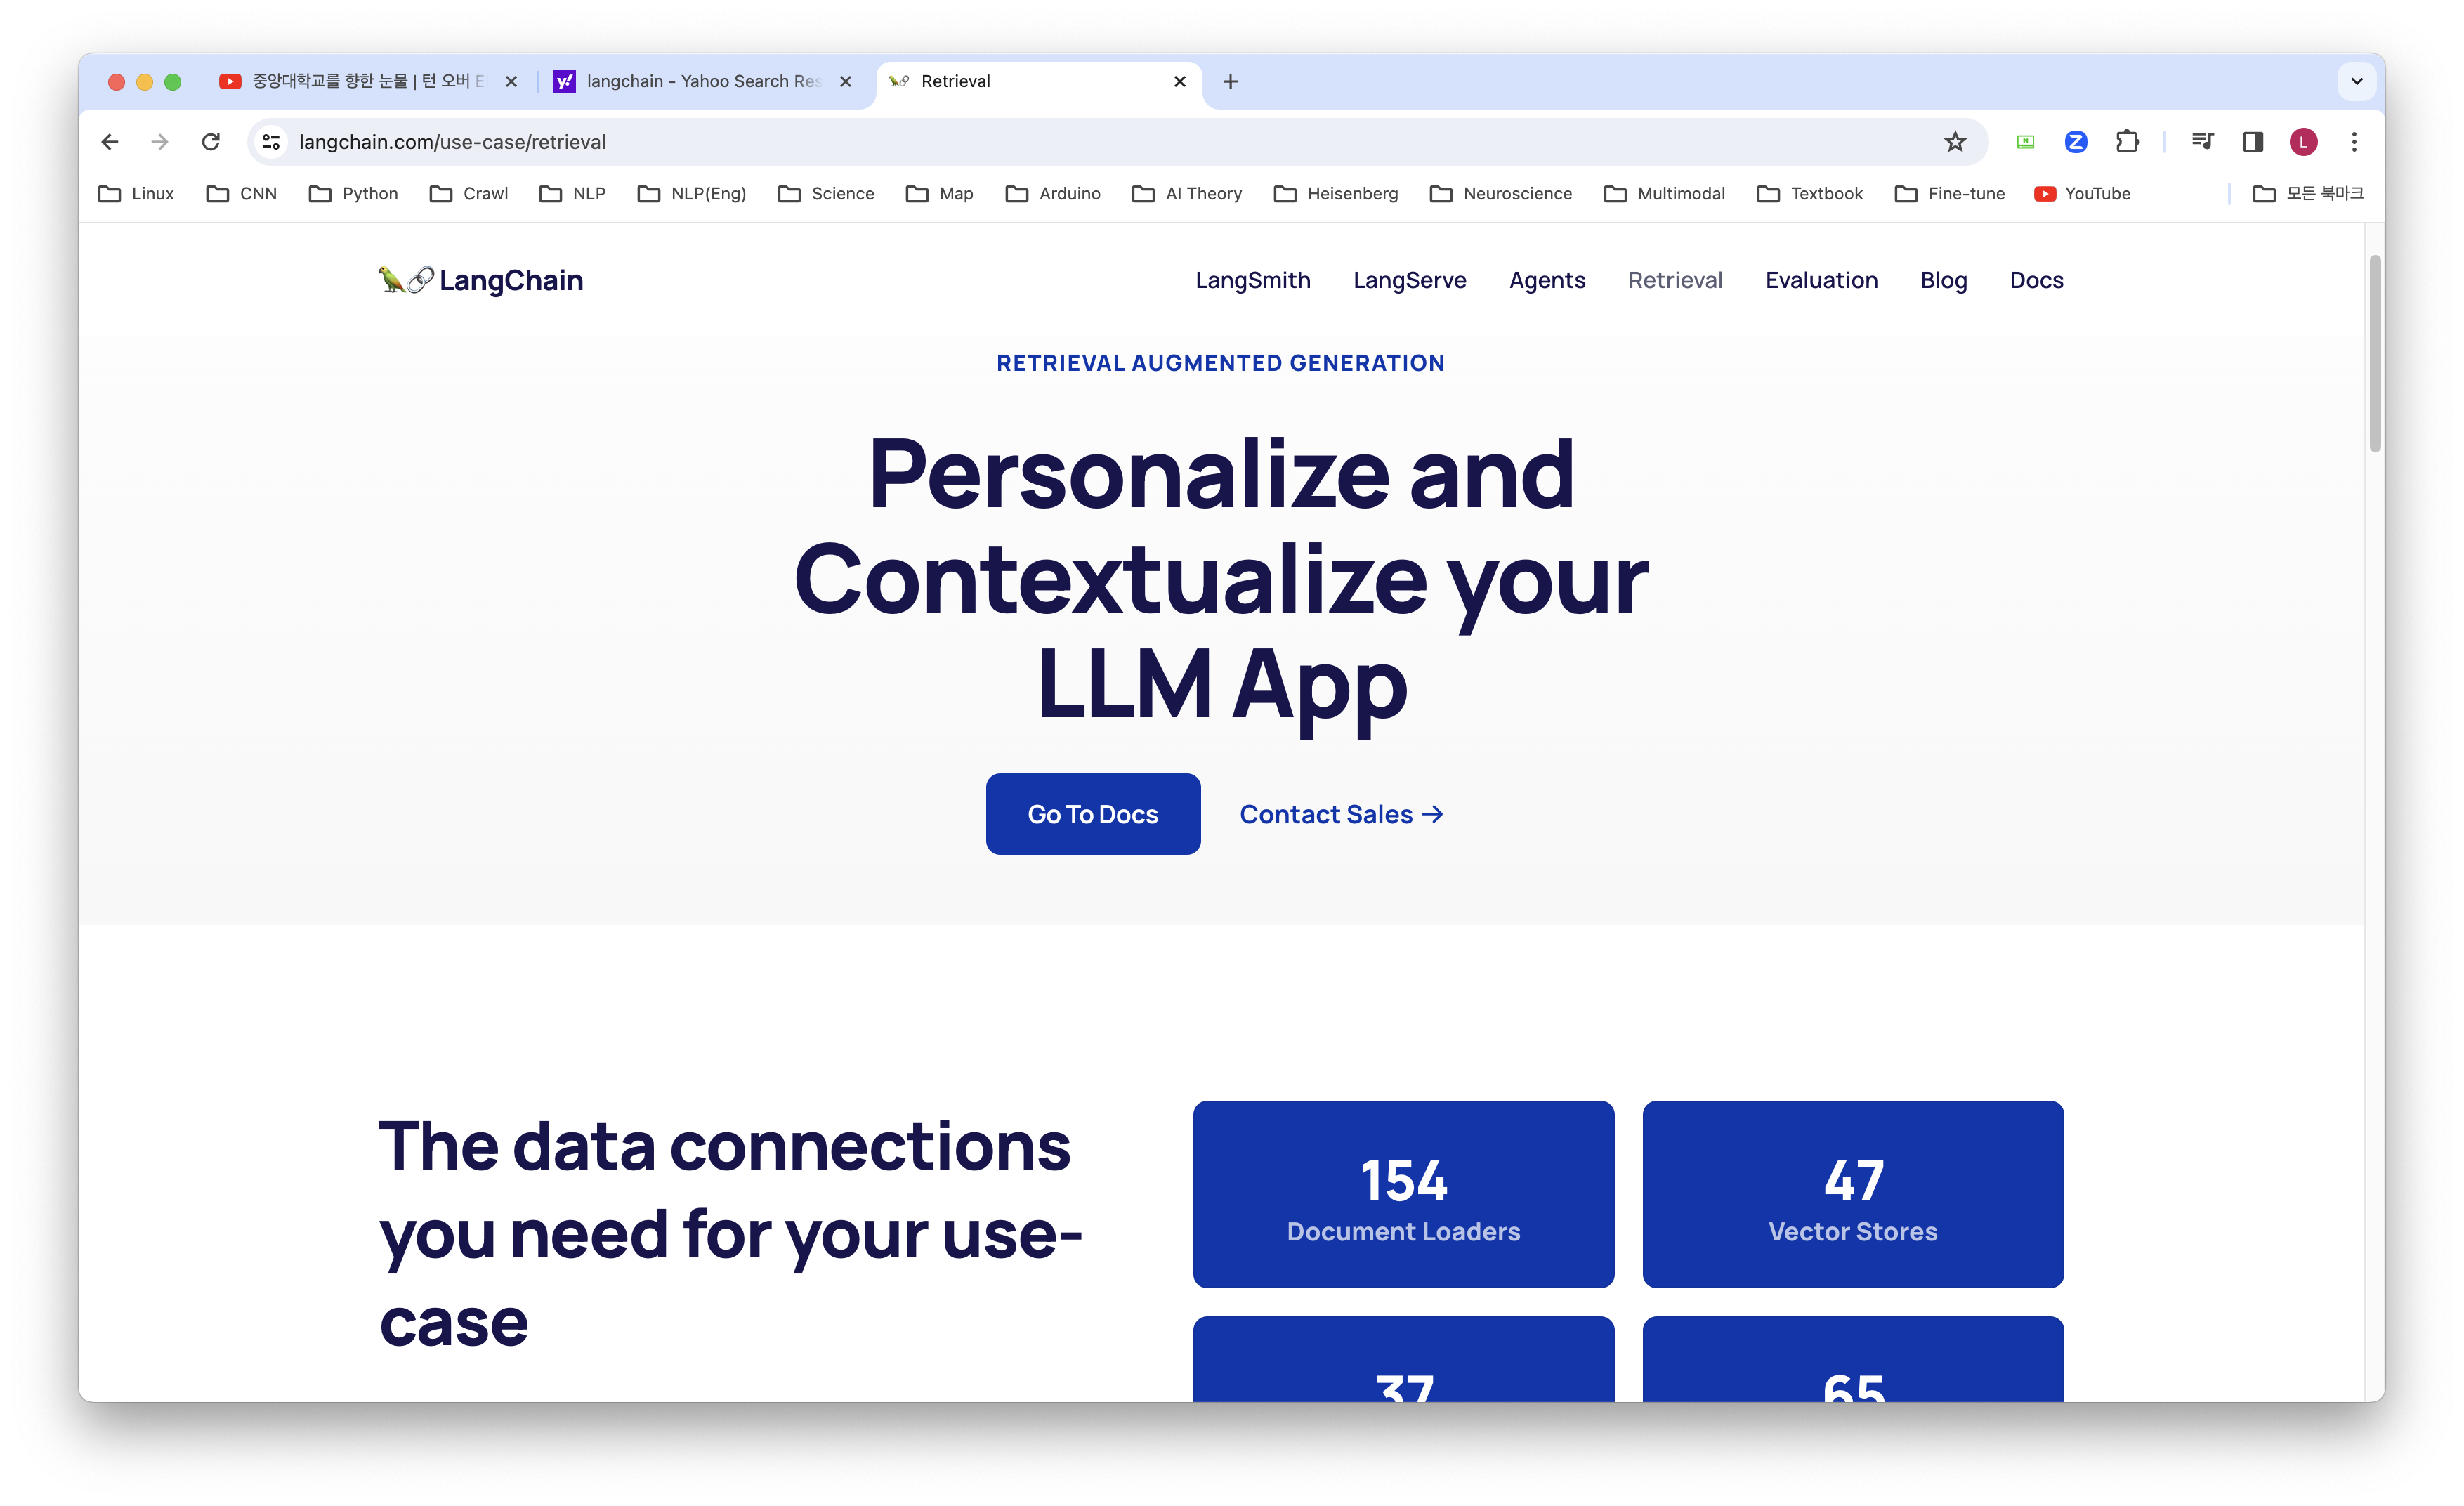

In [4]:
message = 'What book do I have to read to learn python?'

messages = []
messages.append({"role": "system", "content": "You are a helpful assistant."})
messages.append({"role": "user", "content": message})

response = client.chat.completions.create(model=MODEL, messages=messages, temperature=TEMPERATURE)
answer = response.choices[0].message.content

In [8]:
messages

[{'role': 'system', 'content': 'You are a helpful assistant.'},
 {'role': 'user', 'content': 'What book do I have to read to learn python?'}]

In [6]:
print(answer)

There are many great books for learning Python, but one popular choice is "Python Crash Course" by Eric Matthes. This book is designed for beginners and covers the basics of Python programming in a clear and accessible way. It also includes practical projects to help you apply what you've learned. Another popular option is "Automate the Boring Stuff with Python" by Al Sweigart, which focuses on using Python for practical tasks and automation. Both of these books are highly recommended for learning Python.


In [16]:
conversate()

Chat: Hello, dear. what is your name?


AI: Hello! I'm a language model assistant. You can call me Assistant. How can I help you today?


Chat: do you have any special name?


AI: I don't have a specific name, but you can call me whatever you like. How can I assist you today?


Chat: can I call you brick?


AI: Sure, you can call me Brick if you'd like. How can I assist you today?


Chat: hi, brick. I'd like to have new nick name.


AI: Of course! I'd be happy to help you come up with a new nickname. Is there a specific theme or style you have in mind for your new nickname?


Chat: I love Michael Jordan,


AI: How about "Air" as a nickname, in honor of Michael Jordan's famous nickname "Air Jordan"?


Chat: sounds good


AI: Great! From now on, you can go by the nickname "Air." If you need any further assistance, feel free to ask, Air!


Chat: exit


In [17]:
def single_ask(message):
    message = message.strip()

    if message == '':
        print('대화 내용을 입력하세요.')
    elif message == 'exit':
        return

    # 대화 맥락을 고려하여 전체 최대 토큰을 초과하는지 체크하도록 한다.
    total_cnt = check_tokens(context) + len(message)

    if total_cnt >= MAX_TOKENS:
        context.clear()
        print('context cleared.')

    # ChatGPT 대화를 위한 메시지 형태 설정하기
    if len(context) == 0:
        context.append({"role": "system", "content": "You are a helpful assistant."})
        context.append({"role": "user", "content": message})
    else:
        context.append({"role": "user", "content": message})

    response = client.chat.completions.create(model=MODEL, messages=context, temperature=TEMPERATURE)
    answer = response.choices[0].message.content
    print(f"AI: {answer}")
    
    context.append({'role': 'assistant', 'content': answer})

    if check_tokens(context) >= MAX_TOKENS:
        context.clear()

In [18]:
single_ask("list prime numbers from 1 to 100.")

AI: Sure, here are the prime numbers from 1 to 100:

2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97

These are the numbers that are only divisible by 1 and themselves. If you have any other questions, feel free to ask!


In [19]:
single_ask("make python codes to list prime numbers from 1 to 100.")

AI: Certainly! Here's a simple Python code to list prime numbers from 1 to 100:

```python
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

prime_numbers = [num for num in range(1, 101) if is_prime(num)]
print(prime_numbers)
```

When you run this code, it will output the prime numbers from 1 to 100. If you have any other questions or need further assistance, feel free to ask!


In [20]:
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

prime_numbers = [num for num in range(1, 101) if is_prime(num)]
print(prime_numbers)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [21]:
def debate():
    while(1):
        message = input('Human: ')
        message = message.strip()
    
        if message == '':
            print('Input your text.')
            continue
        elif message == 'exit':
            break
    
        # 대화 맥락을 고려하여 전체 최대 토큰을 초과하는지 체크하도록 한다.
        total_cnt = check_tokens(context) + len(message)

        if total_cnt >= MAX_TOKENS:
            context.clear()
            print('context cleared.')

        # ChatGPT 대화를 위한 메시지 형태 설정하기
        if len(context) == 0:
            context.append({"role": "system", "content": "You are an excellent debate advisor. Let's have a debate about the decommissioning of nuclear power plants. You will argue against my opinion(disagree)."})
            context.append({"role": "user", "content": message})
        else:
            context.append({"role": "user", "content": message})

        response = client.chat.completions.create(model=MODEL, messages=context, temperature=TEMPERATURE)
        answer = response.choices[0].message.content
        print(f"AI: {answer}")
        
        context.append({'role': 'assistant', 'content': answer})

        if check_tokens(context) >= MAX_TOKENS:
            context.clear()

In [22]:
debate()

Human:  I don't agree to decommissioning of nuclear power plants. Without nuclear power plants, we cannot generate electricity for societies.


AI: The topic of nuclear power is complex and can be debated from various perspectives. While nuclear power plants can generate significant amounts of electricity, there are also concerns about safety, waste management, and the potential for accidents. Some people advocate for the continued use of nuclear power due to its low carbon emissions, while others argue for transitioning to renewable energy sources such as solar and wind power.

It's important to consider the various factors involved in the debate, including environmental impact, safety, and long-term sustainability. Ultimately, the decision on the future of nuclear power will depend on a combination of technological advancements, public policy, and societal preferences.

If you have specific questions or would like to discuss this topic further, feel free to ask.


Human:  if we shut down nuclear power plants, we will suffer from scarcity of electricity and will cause serious problems in hospitals and police offices.


AI: You raise a valid point. Nuclear power plants currently play a significant role in providing electricity to many communities, and their shutdown could potentially lead to challenges in meeting energy demands. This could indeed have serious implications for critical infrastructure such as hospitals, emergency services, and other essential facilities that rely on a stable electricity supply.

As society considers the future of energy production, it's important to carefully weigh the potential consequences of transitioning away from nuclear power and to develop comprehensive plans for meeting energy needs through alternative sources. This may involve a combination of renewable energy, energy storage technologies, and improvements in energy efficiency to ensure a reliable and sustainable electricity supply.

The transition to alternative energy sources would need to be carefully managed to mitigate potential disruptions and ensure the continued functioning of critical services. It's a 

Human:  exit


# Read single PDF and ask questions about the file

In [ ]:
!pip install pypdf2 tiktoken

In [13]:
from PyPDF2 import PdfReader
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain import OpenAI
from langchain.chains import AnalyzeDocumentChain
from langchain.chains.summarize import load_summarize_chain
from langchain.vectorstores import Chroma
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.chains import ConversationalRetrievalChain
from langchain.chat_models import ChatOpenAI
import os

In [14]:
from dotenv import load_dotenv

load_dotenv()

True

In [15]:
# 내가 읽고 싶은 파일의 위치를 지정하도록 한다.
reader = PdfReader("personal/the scientific method as myth and ideal.pdf")

raw_text = ""

for i, page in enumerate(reader.pages):
    text = page.extract_text()
    if text:
        raw_text += text

In [16]:
llm = OpenAI(temperature=0, openai_api_key = os.getenv('OPENAI_API_KEY'))

In [17]:
summary_chain = load_summarize_chain(llm, chain_type="map_reduce")
summarize_document_chain = AnalyzeDocumentChain(combine_docs_chain=summary_chain)

In [57]:
summarize_document_chain.run(raw_text)

' This article examines the shortcomings of the popularly-taught "Scientific Method" and provides corrections to common misconceptions. It looks at the lack of consensus on the method, with different views from Aristotle, Bacon, and Newton, and discusses the classical inductivism view. It also considers the implications for introductory pedagogical contexts, the criticisms of classical inductivism, the importance of social dynamics for the scientific enterprise, the role of data-mining, the differences between scientific hypotheses and questions, the difference between science and common sense, the aims, values, and virtues of scientific activity, and the contributions of students, audience members, and other sources of support. The author argues that the myth of the scientific method should be discarded, but the ideals associated with it should be promoted.'

## Analyse multiple douments

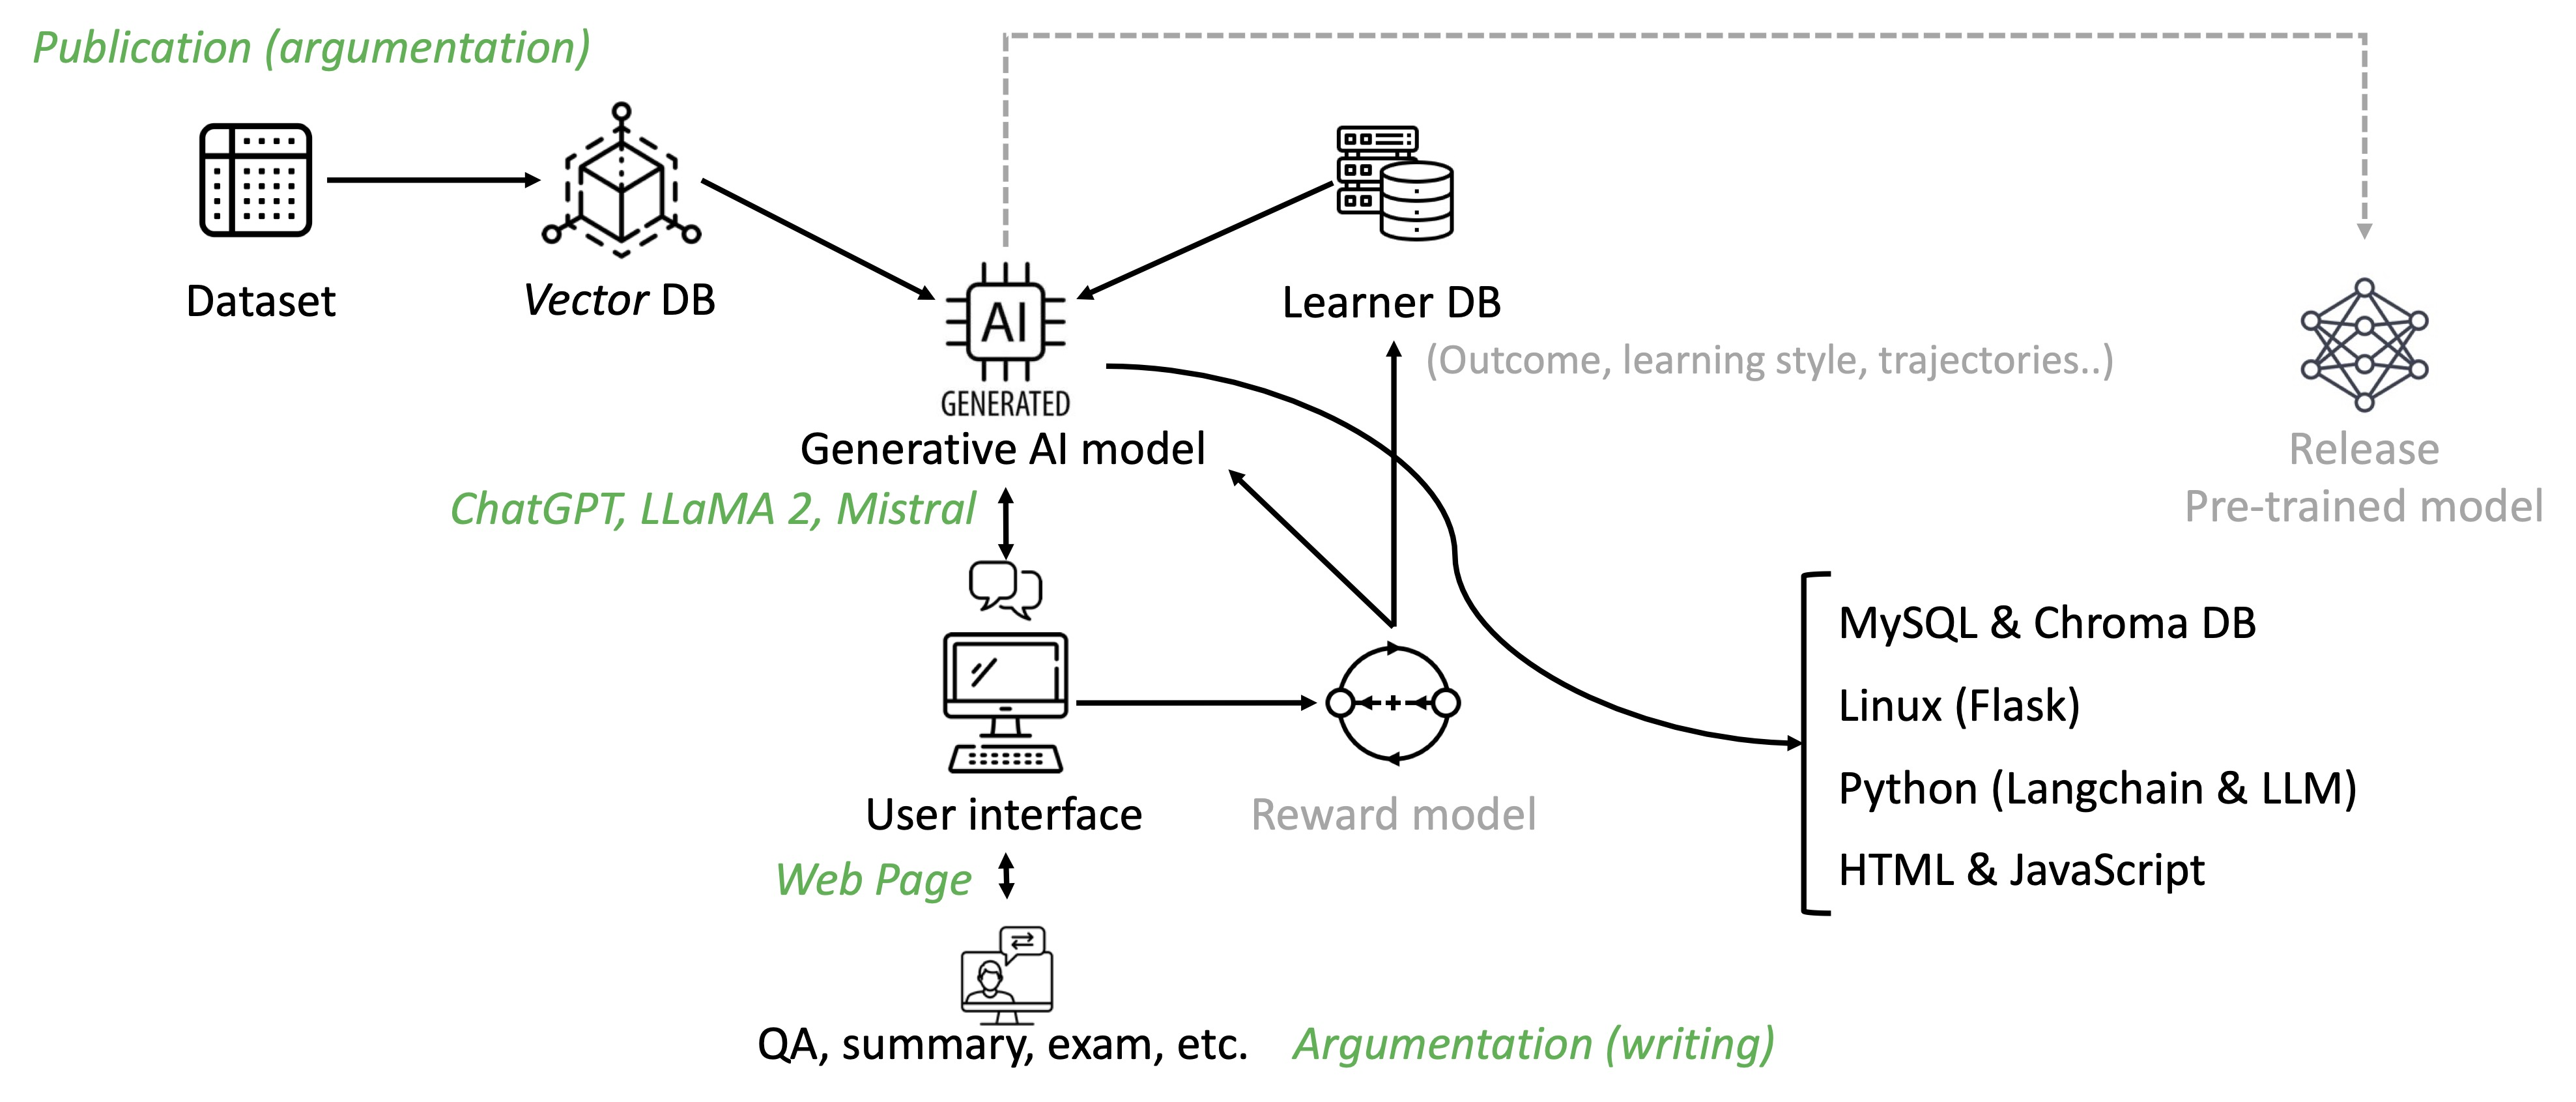

In [61]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.9/277.9 kB 9.3 MB/s eta 0:00:00


In [25]:
TEMPERATURE = 0.0
MAX_TOKENS = 4096
MODEL = 'gpt-3.5-turbo-1106'
context = [] # 리스트

In [18]:
import PyPDF2

source_folder = 'personal'

# 폴더 내 모든 파일 리스트 가져오기
file_list = []
for root, dirs, files in os.walk(source_folder):
    for file in files:
        if file.endswith('.pdf'):
            file_list.append(os.path.join(root, file))

In [19]:
file_list

['personal/dynamic social representations.pdf',
 'personal/the scientific method as myth and ideal.pdf']

In [20]:
# This is a file_list for single PDF
file_list = [file_list[0]]

In [21]:
documents = []

for name in file_list:
    print(f"{name} Loaded:::::")
    reader = PyPDFLoader(name)
    documents.extend(reader.load())

personal/dynamic social representations.pdf Loaded:::::


In [22]:
print (f'You have {len(documents)} document(s) in your data')

You have 14 document(s) in your data


In [23]:
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=100) #chunk overlap seems to work better
documents2 = text_splitter.split_documents(documents)
print(len(documents2))

14


In [26]:
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002', max_retries=20, openai_api_key=os.getenv('OPENAI_API_KEY'))
vectorstore = Chroma.from_documents(documents, embeddings) # 벡터화된 DB
model = ChatOpenAI(temperature=TEMPERATURE, model_name=MODEL, openai_api_key=os.getenv('OPENAI_API_KEY'))
qa = ConversationalRetrievalChain.from_llm(model, vectorstore.as_retriever())

In [27]:
def ask(question):
    result = qa({"question":question, "chat_history":[]})
    
    return result['answer']

In [28]:
ask('What is the key argument of the article?')

'The key argument of the article seems to be that there was a shift in the focus of public discourse and media coverage during the H1N1 pandemic. Specifically, there was a decrease in mentions of far-flung countries and an increase in mentions of local collectives such as risk groups, physicians, and the population. The article also discusses how different categories of collectives were depicted as victims, heroes, or villains in the public discourse and media coverage.'

In [29]:
ask('What is most important findng from the research?')

'The most important finding from the research is the change in public perception of different collectives (authorities, physicians, media, pharmaceutical industry) across three waves of interviews and newspaper articles during the H1N1 outbreak. There was a shift in how these collectives were perceived, with authorities being depicted as heroes initially but then facing distrust and conspiracy theories in the later waves. Physicians were consistently seen as heroes, but there was a shift in their perceived stance on vaccination. The media and pharmaceutical industry were consistently depicted as villains throughout the outbreak. This change in public perception is a significant finding from the research.'

### Save the vector DB

In [34]:
from langchain.vectorstores import Chroma
from langchain.embeddings.openai import OpenAIEmbeddings
from chromadb.config import Settings
import time

In [35]:
persist_directory = 'sample_db'
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002', openai_api_key=os.getenv('OPENAI_API_KEY'), max_retries=20)

In [36]:
i = 0

In [37]:
while i < len(documents):
    size = i + 10
    docs = documents[i:size]
    vectorstore = Chroma.from_documents(docs, embeddings, persist_directory=persist_directory)

    vectorstore.persist()   
    i = i + 10
    print('finishing', i)
    time.sleep(2)

finishing 10
finishing 20


# Build up your own Conversational AI Agent

In [38]:
from langchain.vectorstores import Chroma
from langchain.embeddings.openai import OpenAIEmbeddings
from dotenv import load_dotenv
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ConversationBufferMemory
from langchain.schema import AIMessage, HumanMessage, SystemMessage
import langchain
import os

In [39]:
load_dotenv()
OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

persist_directory = 'sample_db'
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002', openai_api_key=OPENAI_API_KEY, max_retries=20)
vectorstore = Chroma(persist_directory=persist_directory, embedding_function=embeddings)

In [40]:
model = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo-1106')
qa = ConversationalRetrievalChain.from_llm(model, 
                                           vectorstore.as_retriever(search_kwargs={"k": 5}), 
                                           return_source_documents=True)
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

In [17]:
def manage_history(lists):    
    tot_size = 0
    if len(lists) >= 1:
        for item in lists:
            tot_size += len(item.content)

        if tot_size >= 3000:
            lists = lists[2:]  # chat_history 전역 변수를 수정
        
        return lists
    else:
        return lists
        
def questioning(lists, query, show_ref=True):
    lists = manage_history(lists)
    
    result = qa({"question": query, "chat_history": lists})
    print(result['answer']) # 응답 출력
        
    #Reference 출력
    refs = []
    if show_ref: print('Reference:')
        
    for item in result['source_documents']:
        filename_with_extension = os.path.basename(item.metadata['source'])
        filename = os.path.splitext(filename_with_extension)[0]
        if show_ref: print(filename)
        refs.append(filename)
        
    lists.append(HumanMessage(content=query, additional_kwargs={}, example=False))
    lists.append(AIMessage(content=result['answer'], additional_kwargs={'source':refs}, example=False))
        
    return lists, refs

In [42]:
chat_history = []

In [43]:
chat_history, ref = questioning(chat_history, "What is the main cause of influenza?")

The main cause of influenza is the influenza virus, which can be transmitted through respiratory droplets when an infected person coughs, sneezes, or talks.
Reference:
dynamic social representations
dynamic social representations
dynamic social representations
dynamic social representations
dynamic social representations


In [44]:
chat_history = questioning(chat_history, "How can we prevent from catching a flu?")

I don't know.
Reference:
dynamic social representations
dynamic social representations
dynamic social representations
dynamic social representations
dynamic social representations


## Loading Web information

In [51]:
from langchain.document_loaders import WebBaseLoader

In [52]:
loader = WebBaseLoader("https://au.finance.yahoo.com/news/coal-feds-stocking-last-turned-111242158.html")

In [53]:
data = loader.load()

In [54]:
data

[Document(page_content='Coal in the Fed\'s stocking last year turned to sugar plums in 2023        HOME    MAIL    NEWS    FINANCE    SPORT    LIFESTYLE    ENTERTAINMENT    WEATHER    MORE...                 Yahoo Finance      Sign in     Mail  Sign in to view your emails     Finance     Cost Of Living     Watchlists     My Portfolios    Markets    Australian International Markets Commodities Cryptocurrencies Indices Currencies Currency Converter Calendar    Money    Money News Personal Finance Property News     Work     Technology    Industries    Basic Materials Consumer Goods & Media Financial Real Estate Healthcare Industrial Goods Technology Telecom & Utilities     Give Feedback    …   AdvertisementAustralia markets closedALL ORDS7,649.60-12.30 (-0.16%)\xa0AUD/USD0.6722+0.0017 (+0.25%)\xa0ASX 2007,426.40-16.30 (-0.22%)\xa0OIL71.04-0.39 (-0.55%)\xa0GOLD2,034.50-1.20 (-0.06%)\xa0Bitcoin AUD61,064.26-1,324.96 (-2.12%)\xa0CMC Crypto 200841.73-47.50 (-5.34%)\xa0FEELING THE PINCH? :Beat

In [56]:
urls = ['https://www.cnbc.com/2023/12/18/gold-gains-on-weaker-yields-us-inflation-report-in-focus.html',
        'https://finance.yahoo.com/news/live-ftse-european-stocks-inflation-figures-wall-street-090142973.html',
        'https://www.washingtonpost.com/business/2023/12/18/recession-economy-inflation/',
        'https://www.dailyfx.com/news/british-pound-gbp-latest-gbp-usd-on-hold-ahead-of-inflation-report-20231218.html']

loader = WebBaseLoader(urls)
docs = loader.load()
docs

[Document(page_content='Gold gains on weaker yields; U.S. inflation report in focusSkip NavigationMarketsPre-MarketsU.S. MarketsEurope MarketsChina MarketsAsia MarketsWorld MarketsCurrenciesCryptocurrencyFutures & CommoditiesBondsFunds & ETFsBusinessEconomyFinanceHealth & ScienceMediaReal EstateEnergyClimateTransportationIndustrialsRetailWealthSportsLifeSmall BusinessInvestingPersonal FinanceFintechFinancial AdvisorsOptions ActionETF StreetBuffett ArchiveEarningsTrader TalkTechCybersecurityEnterpriseInternetMediaMobileSocial MediaCNBC Disruptor 50Tech GuidePoliticsWhite HousePolicyDefenseCongressEquity and OpportunityEurope PoliticsChina PoliticsAsia PoliticsWorld PoliticsCNBC TVLive AudioLatest VideoTop VideoCEO InterviewsEurope TVAsia TVCNBC PodcastsDigital OriginalsWatchlistInvesting ClubTrust PortfolioAnalysisTrade AlertsMeeting VideosHomestretchJim\'s ColumnsEducationSubscribeSign InPROPro NewsPro LiveStock ScreenerMarket ForecastOptions InvestingSubscribeSign InMenuMake ItselectA

In [57]:
persist_directory = 'news_db'
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002', openai_api_key=os.getenv('OPENAI_API_KEY'), max_retries=20)
vectorstore = Chroma.from_documents(docs, embeddings, persist_directory=persist_directory)
vectorstore.persist()

In [59]:
model = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo-1106')
qa = ConversationalRetrievalChain.from_llm(model, 
                                           vectorstore.as_retriever(search_kwargs={"k": 5}), 
                                           return_source_documents=True)
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

chat_history=[]

In [60]:
questioning(chat_history, "Do you think gold price will rise?")

Number of requested results 5 is greater than number of elements in index 4, updating n_results = 4


I don't have the ability to predict future market movements, including the price of gold. It's always best to consult with a financial advisor or analyst for personalized advice on investment decisions.
Reference:
gold-gains-on-weaker-yields-us-inflation-report-in-focus
live-ftse-european-stocks-inflation-figures-wall-street-090142973
british-pound-gbp-latest-gbp-usd-on-hold-ahead-of-inflation-report-20231218



([HumanMessage(content='Do you think gold price will rise?'),
  AIMessage(content="I don't have the ability to predict future market movements, including the price of gold. It's always best to consult with a financial advisor or analyst for personalized advice on investment decisions.", additional_kwargs={'source': ['gold-gains-on-weaker-yields-us-inflation-report-in-focus', 'live-ftse-european-stocks-inflation-figures-wall-street-090142973', 'british-pound-gbp-latest-gbp-usd-on-hold-ahead-of-inflation-report-20231218', '']})],
 ['gold-gains-on-weaker-yields-us-inflation-report-in-focus',
  'live-ftse-european-stocks-inflation-figures-wall-street-090142973',
  'british-pound-gbp-latest-gbp-usd-on-hold-ahead-of-inflation-report-20231218',
  ''])

In [61]:
questioning(chat_history, "Will inflation hapeen to us sooner or later?")

Number of requested results 5 is greater than number of elements in index 4, updating n_results = 4


Based on the information provided, it seems that the economy is currently experiencing a period of lower inflation, with the possibility of further rate cuts by the Federal Reserve. However, predicting future inflation is complex and depends on a wide range of economic factors. It's best to consult with a financial advisor or economist for a more accurate assessment of future inflation trends.
Reference:

live-ftse-european-stocks-inflation-figures-wall-street-090142973
gold-gains-on-weaker-yields-us-inflation-report-in-focus
british-pound-gbp-latest-gbp-usd-on-hold-ahead-of-inflation-report-20231218


([HumanMessage(content='Do you think gold price will rise?'),
  AIMessage(content="I don't have the ability to predict future market movements, including the price of gold. It's always best to consult with a financial advisor or analyst for personalized advice on investment decisions.", additional_kwargs={'source': ['gold-gains-on-weaker-yields-us-inflation-report-in-focus', 'live-ftse-european-stocks-inflation-figures-wall-street-090142973', 'british-pound-gbp-latest-gbp-usd-on-hold-ahead-of-inflation-report-20231218', '']}),
  HumanMessage(content='Will inflation hapeen to us sooner or later?'),
  AIMessage(content="Based on the information provided, it seems that the economy is currently experiencing a period of lower inflation, with the possibility of further rate cuts by the Federal Reserve. However, predicting future inflation is complex and depends on a wide range of economic factors. It's best to consult with a financial advisor or economist for a more accurate assessment of fu

In [62]:
questioning(chat_history, "If US economy goes to recession, should I buy British pounds?")

Number of requested results 5 is greater than number of elements in index 4, updating n_results = 4


I don't know.
Reference:
british-pound-gbp-latest-gbp-usd-on-hold-ahead-of-inflation-report-20231218
live-ftse-european-stocks-inflation-figures-wall-street-090142973

gold-gains-on-weaker-yields-us-inflation-report-in-focus


([HumanMessage(content='Do you think gold price will rise?'),
  AIMessage(content="I don't have the ability to predict future market movements, including the price of gold. It's always best to consult with a financial advisor or analyst for personalized advice on investment decisions.", additional_kwargs={'source': ['gold-gains-on-weaker-yields-us-inflation-report-in-focus', 'live-ftse-european-stocks-inflation-figures-wall-street-090142973', 'british-pound-gbp-latest-gbp-usd-on-hold-ahead-of-inflation-report-20231218', '']}),
  HumanMessage(content='Will inflation hapeen to us sooner or later?'),
  AIMessage(content="Based on the information provided, it seems that the economy is currently experiencing a period of lower inflation, with the possibility of further rate cuts by the Federal Reserve. However, predicting future inflation is complex and depends on a wide range of economic factors. It's best to consult with a financial advisor or economist for a more accurate assessment of fu

### Read CSV

In [2]:
!pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [9]:
from dotenv import load_dotenv

load_dotenv()

True

In [10]:
# This is a code of transforming xlsx into csv format
import pandas as pd

df = pd.read_excel('Data/wos_gifted_r.xlsx', index_col=0)
df.to_csv('Data/wos_gifted.csv')

In [11]:
from langchain.vectorstores import Chroma
from langchain.embeddings.openai import OpenAIEmbeddings
from dotenv import load_dotenv
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ConversationBufferMemory
from langchain.schema import AIMessage, HumanMessage, SystemMessage
import langchain
import os

In [12]:
from langchain.document_loaders.csv_loader import CSVLoader

loader = CSVLoader(file_path='Data/wos_gifted.csv')
data = loader.load()

In [14]:
persist_directory = 'csv_db'
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002', openai_api_key=os.getenv('OPENAI_API_KEY'), max_retries=20)
vectorstore = Chroma.from_documents(data, embeddings, persist_directory=persist_directory)
vectorstore.persist()

In [15]:
model = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo-1106')
qa = ConversationalRetrievalChain.from_llm(model, 
                                           vectorstore.as_retriever(search_kwargs={"k": 3}), 
                                           return_source_documents=True)
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

chat_history=[]

In [18]:
questioning(chat_history, "What is most popular research in gifted education?")

The most popular research in gifted education covers a wide range of topics, including open science practices, large-scale collaborative research models, educational technologies for gifted students, and rethinking giftedness and gifted education based on psychological science. These topics aim to improve the quality and utility of research findings, provide effective programs for the education and development of gifted children, and propose directions for the field of gifted education based on psychological science.
Reference:
wos_gifted
wos_gifted
wos_gifted


([HumanMessage(content='What is most popular research in gifted education?'),
  AIMessage(content='The most popular research in gifted education covers a wide range of topics, including open science practices, large-scale collaborative research models, educational technologies for gifted students, and rethinking giftedness and gifted education based on psychological science. These topics aim to improve the quality and utility of research findings, provide effective programs for the education and development of gifted children, and propose directions for the field of gifted education based on psychological science.', additional_kwargs={'source': ['wos_gifted', 'wos_gifted', 'wos_gifted']})],
 ['wos_gifted', 'wos_gifted', 'wos_gifted'])

In [21]:
questioning(chat_history, "Tell me top 5 keywords in gifted education.")

The top 5 keywords in gifted education are:
1. Giftedness
2. Ability
3. Intelligence
4. Teacher thinking
5. Ability grouping
Reference:
wos_gifted
wos_gifted
wos_gifted


([HumanMessage(content='What is most popular research in gifted education?'),
  AIMessage(content='The most popular research in gifted education covers a wide range of topics, including open science practices, large-scale collaborative research models, educational technologies for gifted students, and rethinking giftedness and gifted education based on psychological science. These topics aim to improve the quality and utility of research findings, provide effective programs for the education and development of gifted children, and propose directions for the field of gifted education based on psychological science.', additional_kwargs={'source': ['wos_gifted', 'wos_gifted', 'wos_gifted']}),
  HumanMessage(content='Tell the number of papers in physics from 2010 to 2020.'),
  AIMessage(content="I don't have that information.", additional_kwargs={'source': ['wos_gifted', 'wos_gifted', 'wos_gifted']}),
  HumanMessage(content='how many papers in physics were published from 2010 to 2020.'),
 